# Import packages and modules

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import lifelines
import patsy
from sklearn import linear_model, metrics, model_selection

# plot style
sns.set(style = "darkgrid", context = "notebook", palette = "colorblind", font_scale = 1.5)

# Data

## Presidential Cabinet Nominations
Downloaded from [Kaggle - Presidential Cabinet Nominations: Senate confirmation vote records for cabinet nominees since 1976](https://www.kaggle.com/senate/confirmation-votes) and modified with [Donald J. Trump Cabinet Nominations](https://www.senate.gov/legislative/nominations/Trump_cabinet.htm)

In [2]:
presidential_cabinet_nominations = pd.read_csv("presidential_cabinet_nominations.csv")

# sample it
presidential_cabinet_nominations.sample(n = 10, replace = False)

,position,president,nominee,announced_date,received_date,withdrawn_date,confirmed_date,rejected_date,vote_type,votes_for,votes_against
90,Secretary of Transportation,Bill Clinton,Federico Pena,1992-12-24,1993-01-20,NaN,1993-01-21,NaN,Unanimous Consent,100.0,0.0
194,Secretary of Veterans Affairs,Donald J. Trump,David Shulkin,2017-01-11,2017-01-20,NaN,2017-02-13,NaN,NaN,100.0,0.0
195,Secretary of Agriculture,Donald J. Trump,Sonny Perdue,2017-01-19,2017-03-09,NaN,2017-04-24,NaN,NaN,87.0,11.0
23,Secretary of Defense,Ronald Reagan,Caspar Weinberger,1980-12-11,1981-01-20,NaN,1981-01-20,NaN,Roll Call Vote,97.0,2.0
178,Attorney General,Barack Obama,Loretta Lynch,2014-11-09,2015-01-07,NaN,2015-04-23,NaN,Roll Call Vote,56.0,43.0
177,Attorney General,Barack Obama,Loretta Lynch,2014-11-09,2014-11-13,NaN,NaN,NaN,Roll Call Vote,56.0,43.0
46,Secretary of Health & Human Services,Ronald Reagan,Otis Bowen,1985-11-07,1985-12-04,NaN,1985-12-12,NaN,Roll Call Vote,93.0,2.0
182,Secretary of Education,Donald J. Trump,Betsy DeVos,2016-11-23,2017-01-20,NaN,2017-02-07,NaN,NaN,51.0,50.0
165,Secretary of State,Barack Obama,John Kerry,2012-12-21,2013-01-22,NaN,2013-01-29,NaN,Roll Call Vote,94.0,3.0
198,Secretary of Health & Human Services,Donald J. Trump,Alex Azar,2017-11-13,2017-11-14,NaN,2018-01-24,NaN,NaN,55.0,43.0


In [3]:
presidential_cabinet_nominations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   position        211 non-null    object 
 1   president       211 non-null    object 
 2   nominee         211 non-null    object 
 3   announced_date  211 non-null    object 
 4   received_date   200 non-null    object 
 5   withdrawn_date  11 non-null     object 
 6   confirmed_date  190 non-null    object 
 7   rejected_date   1 non-null      object 
 8   vote_type       166 non-null    object 
 9   votes_for       141 non-null    float64
 10  votes_against   141 non-null    float64
dtypes: float64(2), object(9)
memory usage: 18.3+ KB


## Biden Cabinet Nominations

In [4]:
biden_cabinet_nominations = pd.read_csv("biden_cabinet_nominations.csv")

# to date time
biden_cabinet_nominations["announced_datetime"] = pd.to_datetime(biden_cabinet_nominations["announced_date"])

biden_cabinet_nominations["announced_year"] = biden_cabinet_nominations["announced_datetime"].dt.year

biden_cabinet_nominations

,position,president,nominee,announced_date,announced_datetime,announced_year
0,Secretary of Homeland Security,Joseph R. Biden,Alejandro Mayorkas,2020-11-23,2020-11-23,2020
1,Secretary of State,Joseph R. Biden,Antony Blinken,2020-11-24,2020-11-24,2020
2,Secretary of the Interior,Joseph R. Biden,Deb Haaland,2020-12-17,2020-12-17,2020
3,Secretary of Veterans Affairs,Joseph R. Biden,Denis McDonough,2020-12-10,2020-12-10,2020
4,Secretary of Defense,Joseph R. Biden,Gen. Lloyd Austin,2020-12-07,2020-12-07,2020
5,Secretary of Commerce,Joseph R. Biden,Gina Raimondo,2021-01-07,2021-01-07,2021
6,Secretary of the Treasury,Joseph R. Biden,Janet Yellen,2020-11-30,2020-11-30,2020
7,Secretary of Energy,Joseph R. Biden,Jennifer Granholm,2020-12-17,2020-12-17,2020
8,Secretary of Housing & Urban Development,Joseph R. Biden,Marcia Fudge,2020-12-10,2020-12-10,2020
9,Secretary of Labor,Joseph R. Biden,Marty Walsh,2021-01-07,2021-01-07,2021


## Modify dates

In [5]:
# date times
presidential_cabinet_nominations["announced_datetime"] = pd.to_datetime(presidential_cabinet_nominations["announced_date"])

presidential_cabinet_nominations["received_datetime"] = pd.to_datetime(presidential_cabinet_nominations["received_date"])

presidential_cabinet_nominations["withdrawn_datetime"] = pd.to_datetime(presidential_cabinet_nominations["withdrawn_date"])

presidential_cabinet_nominations["confirmed_datetime"] = pd.to_datetime(presidential_cabinet_nominations["confirmed_date"])

presidential_cabinet_nominations["announced_year"] = presidential_cabinet_nominations["announced_datetime"].dt.year

presidential_cabinet_nominations["confirmed_year"] = presidential_cabinet_nominations["confirmed_datetime"].dt.year

In [6]:
presidential_cabinet_nominations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   position            211 non-null    object        
 1   president           211 non-null    object        
 2   nominee             211 non-null    object        
 3   announced_date      211 non-null    object        
 4   received_date       200 non-null    object        
 5   withdrawn_date      11 non-null     object        
 6   confirmed_date      190 non-null    object        
 7   rejected_date       1 non-null      object        
 8   vote_type           166 non-null    object        
 9   votes_for           141 non-null    float64       
 10  votes_against       141 non-null    float64       
 11  announced_datetime  211 non-null    datetime64[ns]
 12  received_datetime   200 non-null    datetime64[ns]
 13  withdrawn_datetime  11 non-null     datetime64[ns]

## Life times

In [7]:
presidential_cabinet_nominations["announced_confirmed_days"] = (presidential_cabinet_nominations["confirmed_datetime"] - presidential_cabinet_nominations["announced_datetime"]).dt.days

presidential_cabinet_nominations["received_confirmed_days"] = (presidential_cabinet_nominations["confirmed_datetime"] - presidential_cabinet_nominations["received_datetime"]).dt.days

## Vote variables

In [8]:
presidential_cabinet_nominations["n_votes"] = presidential_cabinet_nominations["votes_for"] + presidential_cabinet_nominations["votes_against"]

presidential_cabinet_nominations["votes_for_ppt"] = presidential_cabinet_nominations["votes_for"] / presidential_cabinet_nominations["n_votes"]

# sample it
presidential_cabinet_nominations.sample(n = 10, replace = False)

,position,president,nominee,announced_date,received_date,withdrawn_date,confirmed_date,rejected_date,vote_type,votes_for,...,announced_datetime,received_datetime,withdrawn_datetime,confirmed_datetime,announced_year,confirmed_year,announced_confirmed_days,received_confirmed_days,n_votes,votes_for_ppt
139,Secretary of Transportation,George W. Bush,Mary Peters,2006-09-05,2006-09-07,NaN,2006-09-29,NaN,Voice Vote,NaN,...,2006-09-05,2006-09-07,NaT,2006-09-29,2006,2006.0,24.0,22.0,NaN,NaN
174,Secretary of Health & Human Services,Barack Obama,Sylvia Burwell,2014-04-11,2014-04-11,NaN,2014-06-05,NaN,Roll Call Vote,78.0,...,2014-04-11,2014-04-11,NaT,2014-06-05,2014,2014.0,55.0,55.0,95.0,0.821053
37,Secretary of Health & Human Services,Ronald Reagan,Margaret Heckler,1983-01-12,1983-02-22,NaN,1983-03-03,NaN,Roll Call Vote,82.0,...,1983-01-12,1983-02-22,NaT,1983-03-03,1983,1983.0,50.0,9.0,85.0,0.964706
20,Secretary of State,Jimmy Carter,Edmund Muskie,1980-04-29,1980-05-05,NaN,1980-05-07,NaN,Roll Call Vote,94.0,...,1980-04-29,1980-05-05,NaT,1980-05-07,1980,1980.0,8.0,2.0,96.0,0.979167
59,Secretary of Commerce,George H.W. Bush,Robert Mosbacher,1988-12-06,1989-01-20,NaN,1989-01-31,NaN,Roll Call Vote,100.0,...,1988-12-06,1989-01-20,NaT,1989-01-31,1988,1989.0,56.0,11.0,100.0,1.000000
62,Secretary of Housing & Urban Development,George H.W. Bush,Jack Kemp,1988-12-19,1989-01-20,NaN,1989-02-02,NaN,Roll Call Vote,100.0,...,1988-12-19,1989-01-20,NaT,1989-02-02,1988,1989.0,45.0,13.0,100.0,1.000000
36,Secretary of Transportation,Ronald Reagan,Elizabeth Dole,1983-01-05,1983-01-25,NaN,1983-02-01,NaN,Roll Call Vote,97.0,...,1983-01-05,1983-01-25,NaT,1983-02-01,1983,1983.0,27.0,7.0,97.0,1.000000
195,Secretary of Agriculture,Donald J. Trump,Sonny Perdue,2017-01-19,2017-03-09,NaN,2017-04-24,NaN,NaN,87.0,...,2017-01-19,2017-03-09,NaT,2017-04-24,2017,2017.0,95.0,46.0,98.0,0.887755
144,Secretary of Housing & Urban Development,George W. Bush,Steven Preston,2008-04-18,2008-05-01,NaN,2008-06-04,NaN,Voice Vote,NaN,...,2008-04-18,2008-05-01,NaT,2008-06-04,2008,2008.0,47.0,34.0,NaN,NaN
3,Secretary of the Interior,Jimmy Carter,Cecil Andrus,1976-12-18,1977-01-20,NaN,1977-01-20,NaN,Voice Vote,NaN,...,1976-12-18,1977-01-20,NaT,1977-01-20,1976,1977.0,33.0,0.0,NaN,NaN


## Subset only announcement and confirmation

In [9]:
nominee_announced_confirmed = presidential_cabinet_nominations.loc[:, ["position", "president", "nominee", "announced_datetime", "confirmed_datetime", "announced_year", "confirmed_year", "announced_confirmed_days", "votes_for", "votes_against", "n_votes", "votes_for_ppt"]].dropna().drop_duplicates()

nominee_announced_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 4 to 210
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   position                  138 non-null    object        
 1   president                 138 non-null    object        
 2   nominee                   138 non-null    object        
 3   announced_datetime        138 non-null    datetime64[ns]
 4   confirmed_datetime        138 non-null    datetime64[ns]
 5   announced_year            138 non-null    int64         
 6   confirmed_year            138 non-null    float64       
 7   announced_confirmed_days  138 non-null    float64       
 8   votes_for                 138 non-null    float64       
 9   votes_against             138 non-null    float64       
 10  n_votes                   138 non-null    float64       
 11  votes_for_ppt             138 non-null    float64       
dtypes: datetime64[ns](2), 

# Descriptives

In [10]:
nominee_announced_confirmed.groupby("position")["announced_confirmed_days"].describe().sort_values("50%")

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
Secretary of Education,7.0,36.285714,19.250232,15.0,29.00,31.0,37.00,76.0
Secretary of Veterans Affairs,6.0,43.000000,19.707866,25.0,30.00,34.0,58.25,70.0
Secretary of the Interior,9.0,44.555556,18.682285,27.0,31.00,36.0,63.00,76.0
Secretary of Energy,10.0,46.100000,24.043710,11.0,31.50,39.0,66.75,82.0
Secretary of Defense,11.0,36.181818,19.717090,7.0,21.50,40.0,49.00,69.0
Secretary of Agriculture,7.0,54.000000,28.501462,28.0,33.00,41.0,74.00,95.0
Secretary of Transportation,11.0,42.545455,14.313376,22.0,29.00,42.0,54.50,63.0
Secretary of Housing & Urban Development,8.0,45.750000,17.766341,31.0,34.75,42.5,47.00,87.0
Secretary of the Treasury,10.0,43.900000,18.174769,14.0,36.25,44.5,51.50,75.0


# Plots

## Secretary of Housing & Urban Development Announced-Confirm lifetime

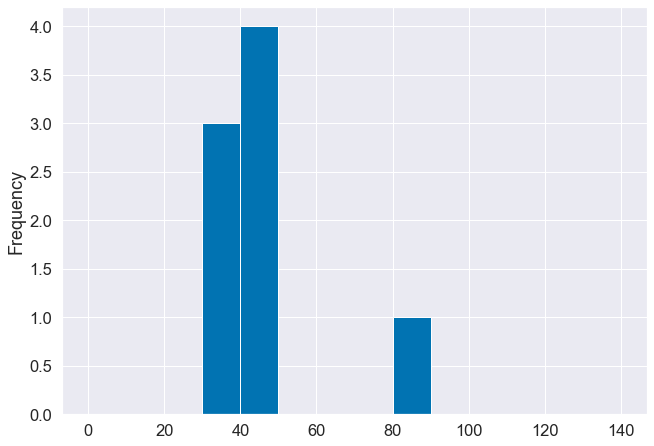

In [42]:
nominee_announced_confirmed.query("position == 'Secretary of Housing & Urban Development'")["announced_confirmed_days"].plot(kind = "hist", bins = np.arange(0, 150, 10), edgecolor = "white", figsize = (10.5, 7.5));

## Secretary of Housing & Urban Development Announced-Confirm lifetime over time

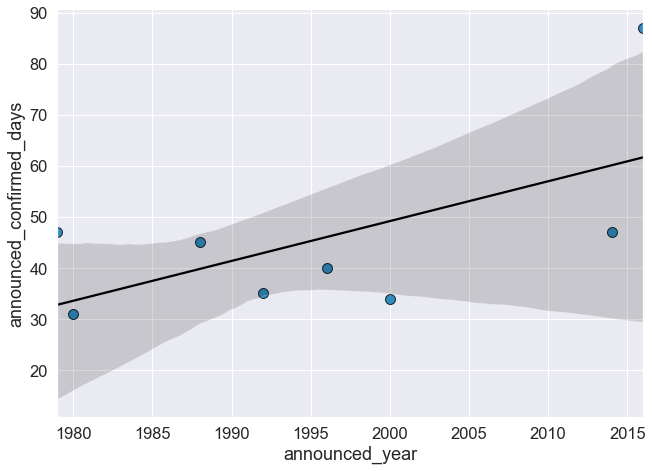

In [59]:
fig, axes = plt.subplots(figsize = (10.5, 7.5))

sns.regplot(x = "announced_year", y = "announced_confirmed_days", data = nominee_announced_confirmed.query("position == 'Secretary of Housing & Urban Development'"), scatter_kws = {"s": 100, "edgecolor": "black"}, lowess = False, line_kws = {"color": "black"}, ax = axes)

## All secretaries announced-confirmed days by year

## Secretary of of the Interior Announced-Confirm lifetime over time

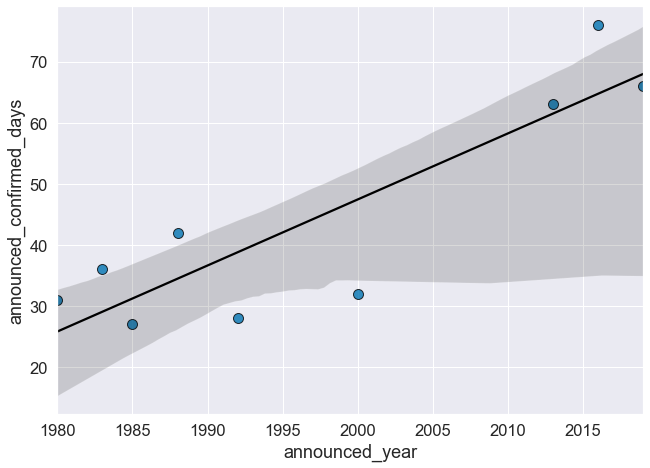

In [62]:
fig, axes = plt.subplots(figsize = (10.5, 7.5))

sns.regplot(x = "announced_year", y = "announced_confirmed_days", data = nominee_announced_confirmed.query("position == 'Secretary of the Interior'"), scatter_kws = {"s": 100, "edgecolor": "black"}, lowess = False, line_kws = {"color": "black"}, ax = axes);

## Secretary of Labor Announced-Confirm lifetime over time

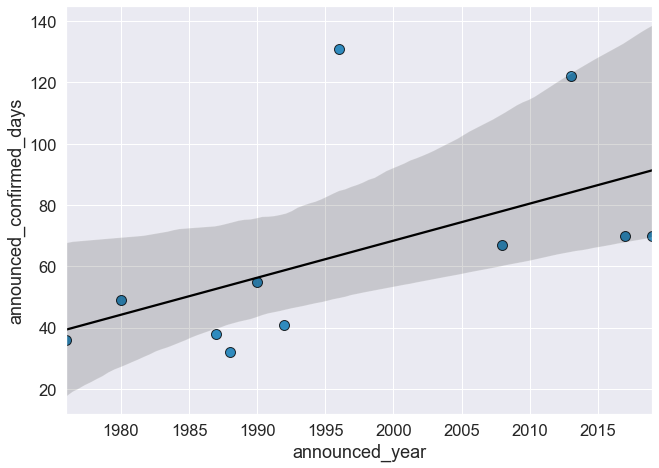

In [63]:
fig, axes = plt.subplots(figsize = (10.5, 7.5))

sns.regplot(x = "announced_year", y = "announced_confirmed_days", data = nominee_announced_confirmed.query("position == 'Secretary of Labor'"), scatter_kws = {"s": 100, "edgecolor": "black"}, lowess = False, line_kws = {"color": "black"}, ax = axes);

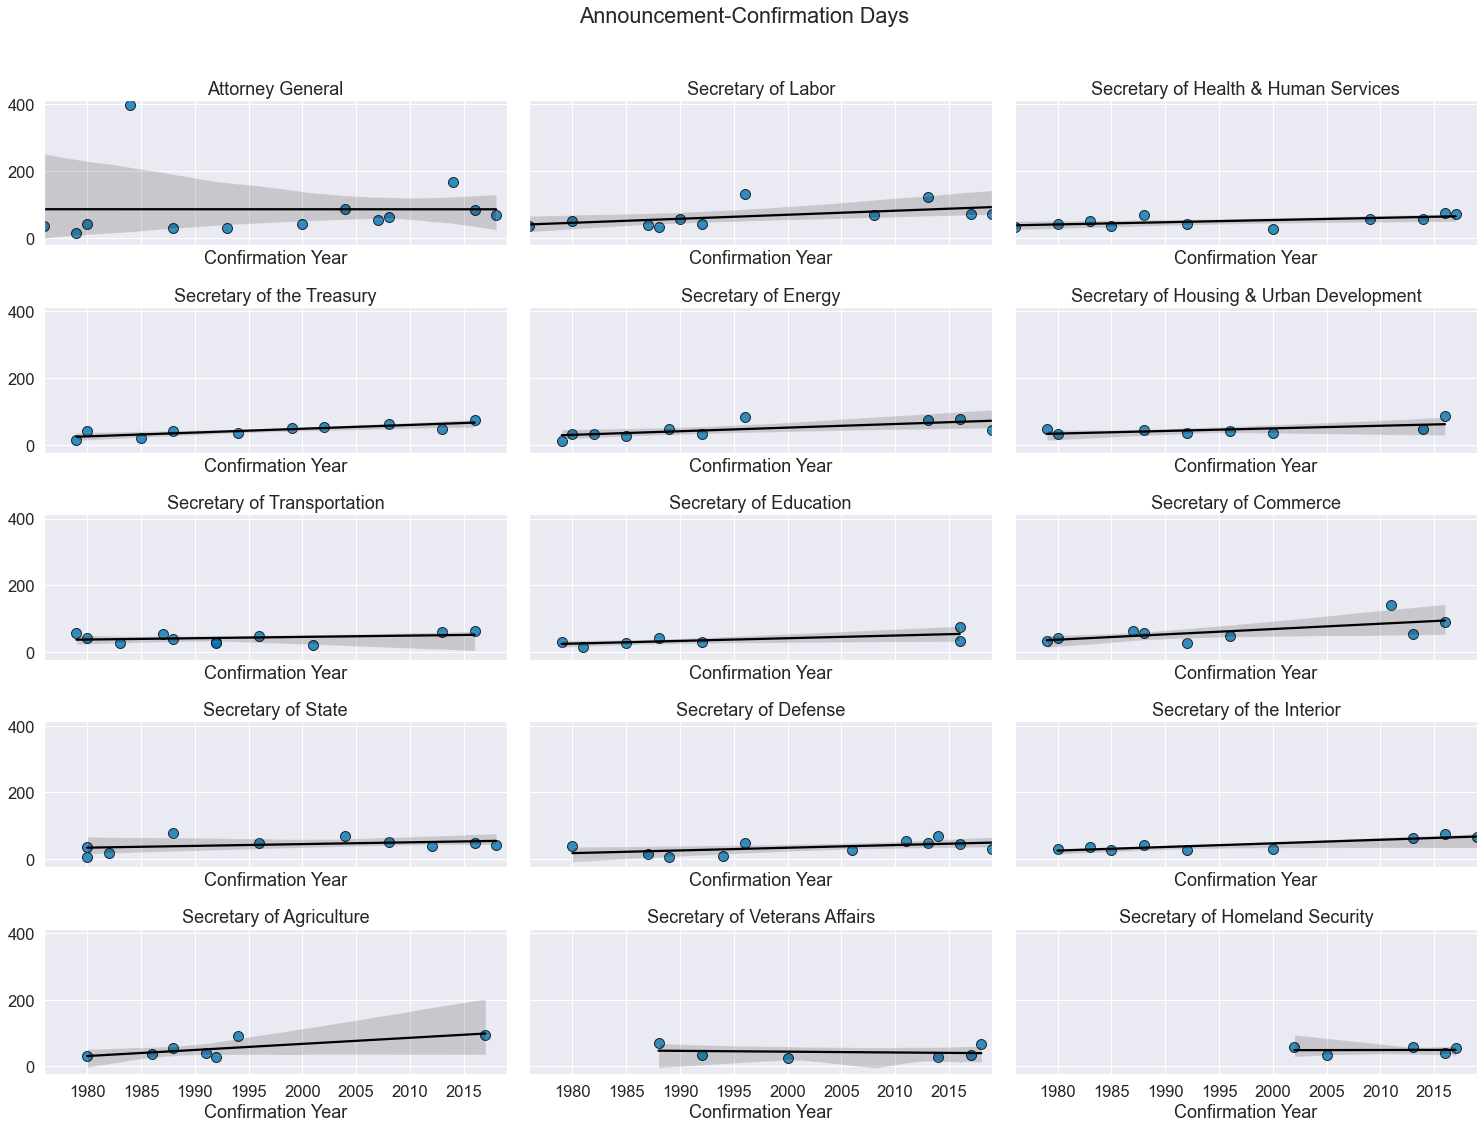

In [14]:
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (10.5 * 2, 7.5 * 2), sharex = True, sharey = True)

axes = axes.flatten()

for i, position_i in enumerate(nominee_announced_confirmed["position"].unique().tolist()):
    # regression plot
    sns.regplot(x = "announced_year", y = "announced_confirmed_days", data = nominee_announced_confirmed.query("position == '{}'".format(position_i)), scatter_kws = {"s": 100, "edgecolor": "black"}, lowess = False, line_kws = {"color": "black"}, ax = axes[i])
    
    axes[i].margins(0.04)
    
    # titles
    axes[i].set(xlabel = "Confirmation Year", ylabel = None, title = position_i)

# big title
fig.suptitle("Announcement-Confirmation Days", y = 1.05)

# tighten
fig.tight_layout()

# Models

## Center confirmation year around minimum year for the position

In [15]:
nominee_announced_confirmed["announced_year_min_c"] = nominee_announced_confirmed.groupby("position")["announced_year"].transform(lambda x: x - x.min())

## Predictor matrix

In [16]:
y, X = patsy.dmatrices("announced_confirmed_days ~ announced_year_min_c * C(position, Sum)", data = nominee_announced_confirmed)

## Ridge, Lasso, Elastic Net regression grid search

In [17]:
# estimators
ridge = linear_model.Ridge(fit_intercept = True, max_iter = 1000)
lasso = linear_model.Lasso(fit_intercept = True, max_iter = 1000)
elastic_net = linear_model.ElasticNet(fit_intercept = True, max_iter = 1000)

# alpha parameters
param_grid1 = {"alpha": (10 ** np.linspace(start = 10, stop = -2, num = 10)) / 2}

# grid search
grid_search1 = model_selection.GridSearchCV(estimator = ridge, param_grid = param_grid1, cv = 5, scoring = "neg_mean_squared_error", verbose = 3)
grid_search2 = model_selection.GridSearchCV(estimator = lasso, param_grid = param_grid1, cv = 5, scoring = "neg_mean_squared_error", verbose = 3)
grid_search3 = model_selection.GridSearchCV(estimator = elastic_net, param_grid = param_grid1, cv = 5, scoring = "neg_mean_squared_error", verbose = 3)

### Ridge

In [18]:
# random state
np.random.seed(7352)

# fit
grid_search1.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] alpha=5000000000.0 ..............................................
[CV] ............... alpha=5000000000.0, score=-663.009, total=   0.0s
[CV] alpha=5000000000.0 ..............................................
[CV] .............. alpha=5000000000.0, score=-4628.690, total=   0.0s
[CV] alpha=5000000000.0 ..............................................
[CV] ............... alpha=5000000000.0, score=-721.861, total=   0.0s
[CV] alpha=5000000000.0 ..............................................
[CV] .............. alpha=5000000000.0, score=-1238.878, total=   0.0s
[CV] alpha=5000000000.0 ..............................................
[CV] ............... alpha=5000000000.0, score=-538.065, total=   0.0s
[CV] alpha=232079441.68063864 ........................................
[CV] ......... alpha=232079441.68063864, score=-662.965, total=   0.0s
[CV] alpha=232079441.68063864 ........................................
[CV] ........ al

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......... alpha=2.320794416806396, score=-4904.879, total=   0.0s
[CV] alpha=2.320794416806396 .........................................
[CV] .......... alpha=2.320794416806396, score=-761.978, total=   0.0s
[CV] alpha=2.320794416806396 .........................................
[CV] .......... alpha=2.320794416806396, score=-697.154, total=   0.0s
[CV] alpha=2.320794416806396 .........................................
[CV] .......... alpha=2.320794416806396, score=-634.018, total=   0.0s
[CV] alpha=0.10772173450159434 .......................................
[CV] ....... alpha=0.10772173450159434, score=-2648.351, total=   0.0s
[CV] alpha=0.10772173450159434 .......................................
[CV] ....... alpha=0.10772173450159434, score=-5028.518, total=   0.0s
[CV] alpha=0.10772173450159434 .......................................
[CV] ........ alpha=0.10772173450159434, score=-859.046, total=   0.0s
[CV] alpha=0.10772173450159434 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([5.00000000e+09, 2.32079442e+08, 1.07721735e+07, 5.00000000e+05,
       2.32079442e+04, 1.07721735e+03, 5.00000000e+01, 2.32079442e+00,
       1.07721735e-01, 5.00000000e-03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=3)

### Lasso

In [19]:
# random state
np.random.seed(7352)

# fit
grid_search2.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] alpha=5000000000.0 ..............................................
[CV] ............... alpha=5000000000.0, score=-663.012, total=   0.0s
[CV] alpha=5000000000.0 ..............................................
[CV] .............. alpha=5000000000.0, score=-4628.690, total=   0.0s
[CV] alpha=5000000000.0 ..............................................
[CV] ............... alpha=5000000000.0, score=-721.861, total=   0.0s
[CV] alpha=5000000000.0 ..............................................
[CV] .............. alpha=5000000000.0, score=-1238.880, total=   0.0s
[CV] alpha=5000000000.0 ..............................................
[CV] ............... alpha=5000000000.0, score=-538.068, total=   0.0s
[CV] alpha=232079441.68063864 ........................................
[CV] ......... alpha=232079441.68063864, score=-663.012, total=   0.0s
[CV] alpha=232079441.68063864 ........................................
[CV] ........ al

/Users/nicholasmichalak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 922.4499779672478, tolerance: 17.25435855855856
  positive)
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([5.00000000e+09, 2.32079442e+08, 1.07721735e+07, 5.00000000e+05,
       2.32079442e+04, 1.07721735e+03, 5.00000000e+01, 2.32079442e+00,
       1.07721735e-01, 5.00000000e-03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=3)

### Elastic Net

In [20]:
# random state
np.random.seed(7352)

# fit
grid_search3.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] alpha=5000000000.0 ..............................................
[CV] ............... alpha=5000000000.0, score=-663.012, total=   0.0s
[CV] alpha=5000000000.0 ..............................................
[CV] .............. alpha=5000000000.0, score=-4628.690, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] alpha=5000000000.0 ..............................................
[CV] ............... alpha=5000000000.0, score=-721.861, total=   0.0s
[CV] alpha=5000000000.0 ..............................................
[CV] .............. alpha=5000000000.0, score=-1238.880, total=   0.0s
[CV] alpha=5000000000.0 ..............................................
[CV] ............... alpha=5000000000.0, score=-538.068, total=   0.0s
[CV] alpha=232079441.68063864 ........................................
[CV] ......... alpha=232079441.68063864, score=-663.012, total=   0.0s
[CV] alpha=232079441.68063864 ........................................
[CV] ........ alpha=232079441.68063864, score=-4628.690, total=   0.0s
[CV] alpha=232079441.68063864 ........................................
[CV] ......... alpha=232079441.68063864, score=-721.861, total=   0.0s
[CV] alpha=232079441.68063864 ........................................
[CV] ........ alpha=232079441.68063864, score=-1238.880, total=   0.0s
[CV] a

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([5.00000000e+09, 2.32079442e+08, 1.07721735e+07, 5.00000000e+05,
       2.32079442e+04, 1.07721735e+03, 5.00000000e+01, 2.32079442e+00,
       1.07721735e-01, 5.00000000e-03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=3)

## Best parameters

In [21]:
grid_search1.best_params_, grid_search2.best_params_, grid_search3.best_params_

({'alpha': 1077.2173450159432},
 {'alpha': 2.320794416806396},
 {'alpha': 2.320794416806396})

## Best CV RMSE

In [22]:
np.sqrt(grid_search1.best_score_ * -1), np.sqrt(grid_search2.best_score_ * -1), np.sqrt(grid_search3.best_score_ * -1)

(36.86793355220227, 37.16347904865173, 37.13571559275374)

## Add predictions to data frame

In [23]:
nominee_announced_confirmed["announced_confirmed_days_predicted"] = grid_search1.predict(X)

## RMSE per position

In [33]:
nominee_announced_confirmed["error"] = nominee_announced_confirmed["announced_confirmed_days"] - nominee_announced_confirmed["announced_confirmed_days_predicted"]

nominee_announced_confirmed["squared_error"] = nominee_announced_confirmed["error"] ** 2

nominee_announced_confirmed.groupby("position")["squared_error"].mean().apply(np.sqrt)

position
Attorney General                            100.919477
Secretary of Agriculture                     18.578714
Secretary of Commerce                        25.303047
Secretary of Defense                         18.391560
Secretary of Education                       16.259484
Secretary of Energy                          17.376798
Secretary of Health & Human Services         12.475808
Secretary of Homeland Security               12.201038
Secretary of Housing & Urban Development     13.417142
Secretary of Labor                           27.004108
Secretary of State                           18.227247
Secretary of Transportation                  12.906583
Secretary of Veterans Affairs                18.988127
Secretary of the Interior                    11.088197
Secretary of the Treasury                    11.889244
Name: squared_error, dtype: float64

## Mean error per position

In [41]:
nominee_announced_confirmed.groupby("position")["error"].describe().sort_values("mean")

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
Secretary of Education,7.0,-7.661427,15.490392,-23.060023,-17.488820,-12.096780,-2.704740,21.913931
Secretary of Defense,11.0,-6.327824,18.111569,-32.303468,-19.615176,-0.825618,5.952335,23.657504
Secretary of the Interior,9.0,-4.683106,10.660380,-19.097701,-13.640606,-3.246327,1.656646,13.748065
Secretary of the Treasury,10.0,-4.192671,11.727253,-22.571293,-11.398719,-1.172442,2.874744,13.929225
Secretary of Energy,10.0,-3.621331,17.914583,-26.160417,-15.937453,-5.720779,7.744515,31.576506
Secretary of Housing & Urban Development,8.0,-2.070612,14.171693,-16.621127,-11.020833,-7.439715,4.000549,26.136992
Secretary of State,10.0,-1.826321,19.116516,-29.177080,-13.402601,-3.029599,2.228595,35.888467
Secretary of Transportation,11.0,-1.188878,13.478988,-25.217907,-12.559445,3.063005,7.623631,18.818106
Secretary of Health & Human Services,11.0,-0.372596,13.078901,-26.833732,-6.789170,-1.700046,8.166268,23.988019


## Mean absolute error per position

In [26]:
nominee_announced_confirmed.groupby("position")["error"].apply(lambda x: np.abs(x).mean())

position
Attorney General                            49.293692
Secretary of Agriculture                    15.393016
Secretary of Commerce                       17.729691
Secretary of Defense                        15.021451
Secretary of Education                      14.132484
Secretary of Energy                         14.801450
Secretary of Health & Human Services         9.692657
Secretary of Homeland Security              10.721093
Secretary of Housing & Urban Development    11.575267
Secretary of Labor                          19.182235
Secretary of State                          14.009197
Secretary of Transportation                 10.945049
Secretary of Veterans Affairs               16.878746
Secretary of the Interior                    8.737372
Secretary of the Treasury                    9.254119
Name: error, dtype: float64

## Best estimator $R^2$

In [27]:
metrics.r2_score(y_true = y, y_pred = grid_search1.best_estimator_.predict(X)), metrics.r2_score(y_true = y, y_pred = grid_search2.best_estimator_.predict(X)), metrics.r2_score(y_true = y, y_pred = grid_search3.best_estimator_.predict(X))

(0.16416295275687975, 0.16485171091135653, 0.16667482974516368)

## Plot errors per position

/Users/nicholasmichalak/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/nicholasmichalak/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/nicholasmichalak/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNu

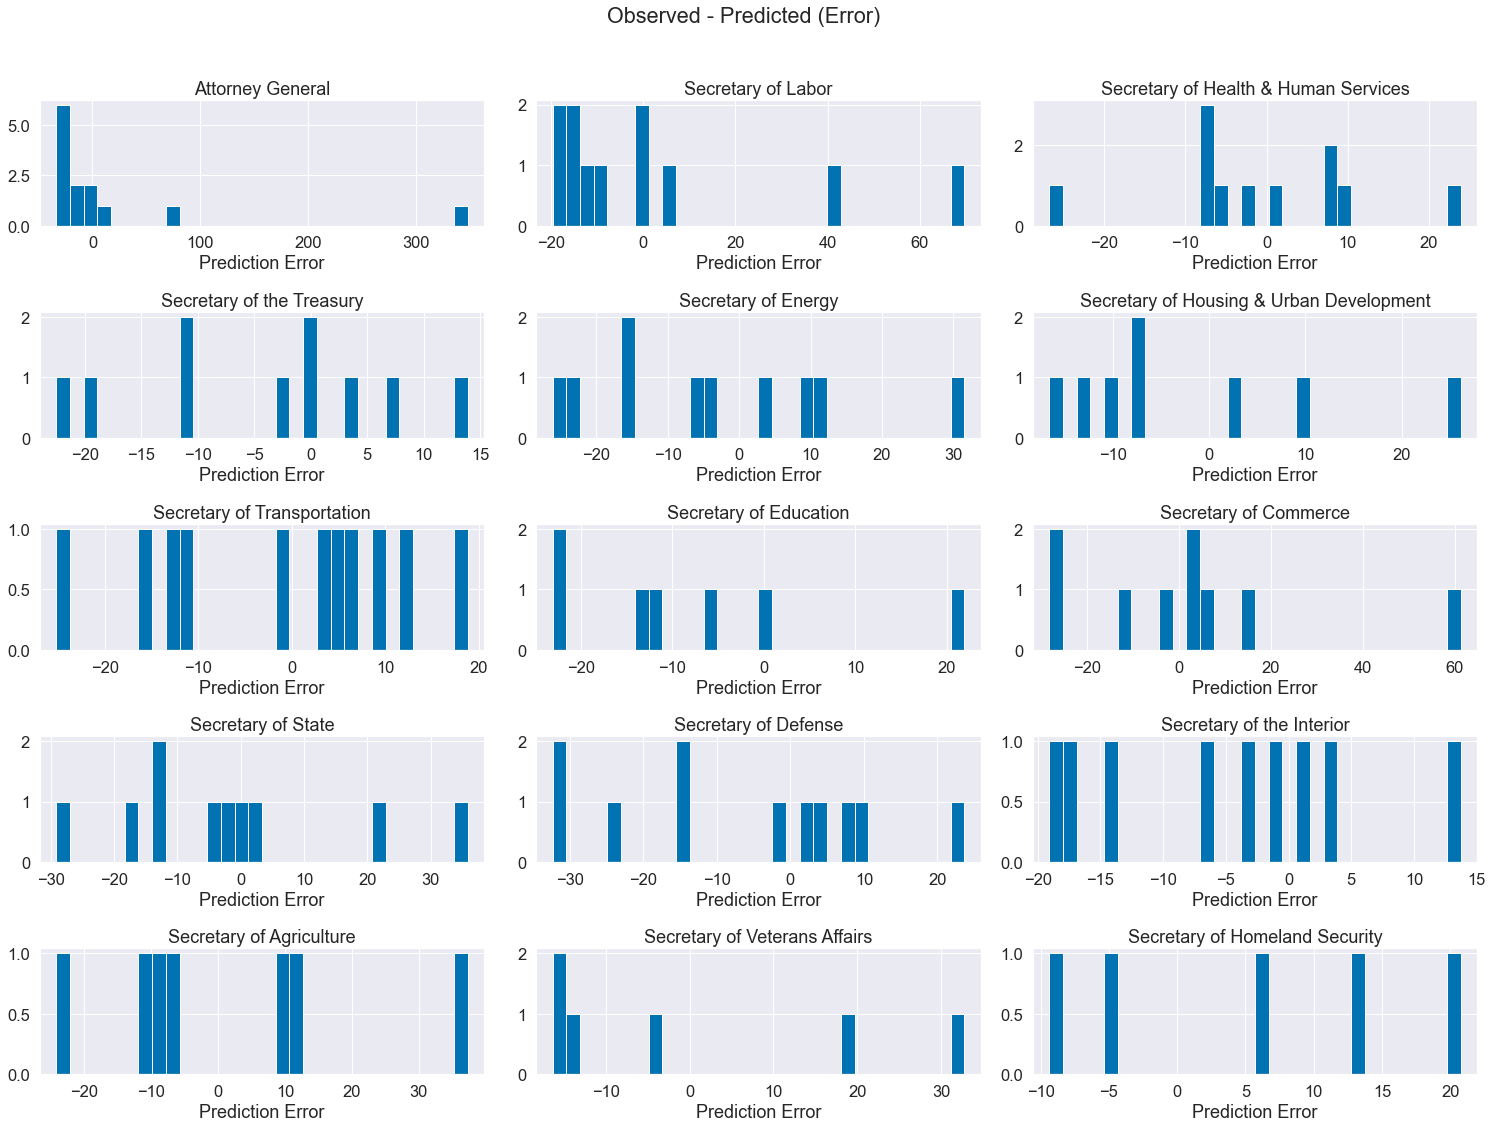

In [37]:
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (10.5 * 2, 7.5 * 2), sharex = False, sharey = False)

axes = axes.flatten()

for i, position_i in enumerate(nominee_announced_confirmed["position"].unique().tolist()):
    # histogram
    nominee_announced_confirmed.query("position == '{}'".format(position_i))["error"].plot(kind = "hist", bins = 30, ax = axes[i])
    
    axes[i].margins(0.04)
    
    # titles
    axes[i].set(xlabel = "Prediction Error", ylabel = None, title = position_i)

# big title
fig.suptitle("Observed - Predicted (Error)", y = 1.05)

# tighten
fig.tight_layout()

# Make predictions for Biden cabinet members

## Center confirmation year around minimum year for the position

In [28]:
biden_cabinet_nominations = biden_cabinet_nominations.merge(nominee_announced_confirmed.groupby("position")["announced_year"].min().reset_index(name = "position_year1"), how = "left", on = "position")

biden_cabinet_nominations["announced_year_min_c"] = biden_cabinet_nominations["announced_year"] - biden_cabinet_nominations["position_year1"]

# see it
biden_cabinet_nominations

,position,president,nominee,announced_date,announced_datetime,announced_year,position_year1,announced_year_min_c
0,Secretary of Homeland Security,Joseph R. Biden,Alejandro Mayorkas,2020-11-23,2020-11-23,2020,2002,18
1,Secretary of State,Joseph R. Biden,Antony Blinken,2020-11-24,2020-11-24,2020,1980,40
2,Secretary of the Interior,Joseph R. Biden,Deb Haaland,2020-12-17,2020-12-17,2020,1980,40
3,Secretary of Veterans Affairs,Joseph R. Biden,Denis McDonough,2020-12-10,2020-12-10,2020,1988,32
4,Secretary of Defense,Joseph R. Biden,Gen. Lloyd Austin,2020-12-07,2020-12-07,2020,1980,40
5,Secretary of Commerce,Joseph R. Biden,Gina Raimondo,2021-01-07,2021-01-07,2021,1979,42
6,Secretary of the Treasury,Joseph R. Biden,Janet Yellen,2020-11-30,2020-11-30,2020,1979,41
7,Secretary of Energy,Joseph R. Biden,Jennifer Granholm,2020-12-17,2020-12-17,2020,1979,41
8,Secretary of Housing & Urban Development,Joseph R. Biden,Marcia Fudge,2020-12-10,2020-12-10,2020,1979,41
9,Secretary of Labor,Joseph R. Biden,Marty Walsh,2021-01-07,2021-01-07,2021,1976,45


## Predictor matrix

In [29]:
X_biden = patsy.dmatrix("announced_year_min_c * C(position, Sum)", data = biden_cabinet_nominations)

## Add predictions to Biden data frame

In [30]:
# days
biden_cabinet_nominations["announced_confirmed_days_predicted"] = grid_search1.predict(X_biden)

# add days to annoncement date
biden_cabinet_nominations["confirmed_datetime_predicted"] = biden_cabinet_nominations["announced_datetime"] + biden_cabinet_nominations["announced_confirmed_days_predicted"].apply(lambda x: pd.DateOffset(n = int(round(x))))

# see it
biden_cabinet_nominations

/Users/nicholasmichalak/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimelike.py:1215: PerformanceWarning: Adding/subtracting array of DateOffsets to DatetimeArray not vectorized
  PerformanceWarning,


,position,president,nominee,announced_date,announced_datetime,announced_year,position_year1,announced_year_min_c,announced_confirmed_days_predicted,confirmed_datetime_predicted
0,Secretary of Homeland Security,Joseph R. Biden,Alejandro Mayorkas,2020-11-23,2020-11-23,2020,2002,18,51.571250,2021-01-14
1,Secretary of State,Joseph R. Biden,Antony Blinken,2020-11-24,2020-11-24,2020,1980,40,56.849344,2021-01-20
2,Secretary of the Interior,Joseph R. Biden,Deb Haaland,2020-12-17,2020-12-17,2020,1980,40,65.040493,2021-02-20
3,Secretary of Veterans Affairs,Joseph R. Biden,Denis McDonough,2020-12-10,2020-12-10,2020,1988,32,47.248548,2021-01-26
4,Secretary of Defense,Joseph R. Biden,Gen. Lloyd Austin,2020-12-07,2020-12-07,2020,1980,40,46.791862,2021-01-23
5,Secretary of Commerce,Joseph R. Biden,Gina Raimondo,2021-01-07,2021-01-07,2021,1979,42,94.224798,2021-04-11
6,Secretary of the Treasury,Joseph R. Biden,Janet Yellen,2020-11-30,2020-11-30,2020,1979,41,63.719367,2021-02-02
7,Secretary of Energy,Joseph R. Biden,Jennifer Granholm,2020-12-17,2020-12-17,2020,1979,41,69.147838,2021-02-24
8,Secretary of Housing & Urban Development,Joseph R. Biden,Marcia Fudge,2020-12-10,2020-12-10,2020,1979,41,63.423479,2021-02-11
9,Secretary of Labor,Joseph R. Biden,Marty Walsh,2021-01-07,2021-01-07,2021,1976,45,91.415980,2021-04-08


## Export predictions

In [31]:
biden_cabinet_nominations.loc[:, ["position", "nominee", "announced_datetime", "announced_year", "announced_confirmed_days_predicted", "confirmed_datetime_predicted"]].sort_values("announced_datetime").to_csv("202101_biden_cabinet_confirmation_predictions.csv", index = False)